In [1]:
# Importing all the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from statistics import mode
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn import preprocessing


In [2]:
# read in data
df = pd.read_csv('laterality_data.csv')

In [3]:
# check in on data
df.head()

,Match Flag,subjectID,Data,Order_FA_child,Order_volume_child,Order_MD_child,structureID,gender,gender_non,Age_gr_12,...,LI MD,LI Volume,TOI,Control,category,hand,Hand,ROI 1,ROI 2,Type
0,3,P1158,PING,AnterioFrontoCerebellar,AnterioFrontoCerebellar,AnterioFrontoCerebellar,AnterioFrontoCerebellar,0,M,0-12,...,0.015758,-0.068848,no,no,Cerebellar,NaN,NaN,Frontal,Cerebellum,Projection
1,3,P1158,PING,Arc,Arc,Arc,Arc,0,M,0-12,...,NaN,0.167642,no,yes,Language,NaN,NaN,Frontal,Temporal,Association
2,3,P1158,PING,Aslant,Aslant,Aslant,Aslant,0,M,0-12,...,NaN,0.010843,yes,no,Vertical,NaN,NaN,Frontal,Frontal,Association
3,3,P1158,PING,CST,CST,CST,CST,0,M,0-12,...,0.002403,-0.012036,no,no,Motor,NaN,NaN,Medulla,Motor Cortex,Projection
4,3,P1158,PING,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,0,M,0-12,...,-0.014053,-0.066723,no,no,Cerebellar,NaN,NaN,Frontal,Cerebellum,Projection


In [4]:
df.count()

Match Flag            44648
subjectID             44648
Data                  44648
Order_FA_child        44648
Order_volume_child    44648
Order_MD_child        44648
structureID           44648
gender                44648
gender_non            44648
Age_gr_12             44648
Age Group             44648
Age                   44648
LI FA                 41241
LI MD                 41272
LI Volume             41040
TOI                   44648
Control               44648
category              44648
hand                  43510
Hand                  43390
ROI 1                 44648
ROI 2                 44648
Type                  44648
dtype: int64

In [5]:
# dropping all NA's or missing data
df.dropna(inplace=True)

In [6]:
df.count()

Match Flag            34609
subjectID             34609
Data                  34609
Order_FA_child        34609
Order_volume_child    34609
Order_MD_child        34609
structureID           34609
gender                34609
gender_non            34609
Age_gr_12             34609
Age Group             34609
Age                   34609
LI FA                 34609
LI MD                 34609
LI Volume             34609
TOI                   34609
Control               34609
category              34609
hand                  34609
Hand                  34609
ROI 1                 34609
ROI 2                 34609
Type                  34609
dtype: int64

In [7]:
df.describe()

,Match Flag,gender,Age,LI FA,LI MD,LI Volume,hand
count,34609.0,34609.000000,34609.000000,34609.000000,34609.000000,34609.000000,34609.000000
mean,3.0,0.556618,36.460999,0.014758,-0.009101,0.003943,70.359184
std,0.0,0.496791,15.026259,0.026767,0.024357,0.110333,46.750252
min,3.0,0.000000,18.000000,-0.187483,-0.120564,-0.726049,-100.000000
25%,3.0,0.000000,27.000000,-0.001247,-0.023805,-0.052326,70.000000
50%,3.0,1.000000,31.000000,0.014058,-0.008778,0.008024,88.000000
75%,3.0,1.000000,38.000000,0.029813,0.005455,0.063520,100.000000
max,3.0,1.000000,86.000000,0.237326,0.141657,0.649430,100.000000


In [8]:
# find all the columns for the features that we desire adn create a new dataframe
#cols = [3, 4, 5, 14, 19, 23, 28]
cols = [0, 7, 11, 12, 13]
the_ml_data = df[df.columns[cols]]

In [9]:
# Check in on data 
the_ml_data.head()
the_ml_data.count()

Match Flag    34609
gender        34609
Age           34609
LI FA         34609
LI MD         34609
dtype: int64

In [10]:
# Find quick statistics about each feature
the_ml_data.describe()

,Match Flag,gender,Age,LI FA,LI MD
count,34609.0,34609.000000,34609.000000,34609.000000,34609.000000
mean,3.0,0.556618,36.460999,0.014758,-0.009101
std,0.0,0.496791,15.026259,0.026767,0.024357
min,3.0,0.000000,18.000000,-0.187483,-0.120564
25%,3.0,0.000000,27.000000,-0.001247,-0.023805
50%,3.0,1.000000,31.000000,0.014058,-0.008778
75%,3.0,1.000000,38.000000,0.029813,0.005455
max,3.0,1.000000,86.000000,0.237326,0.141657


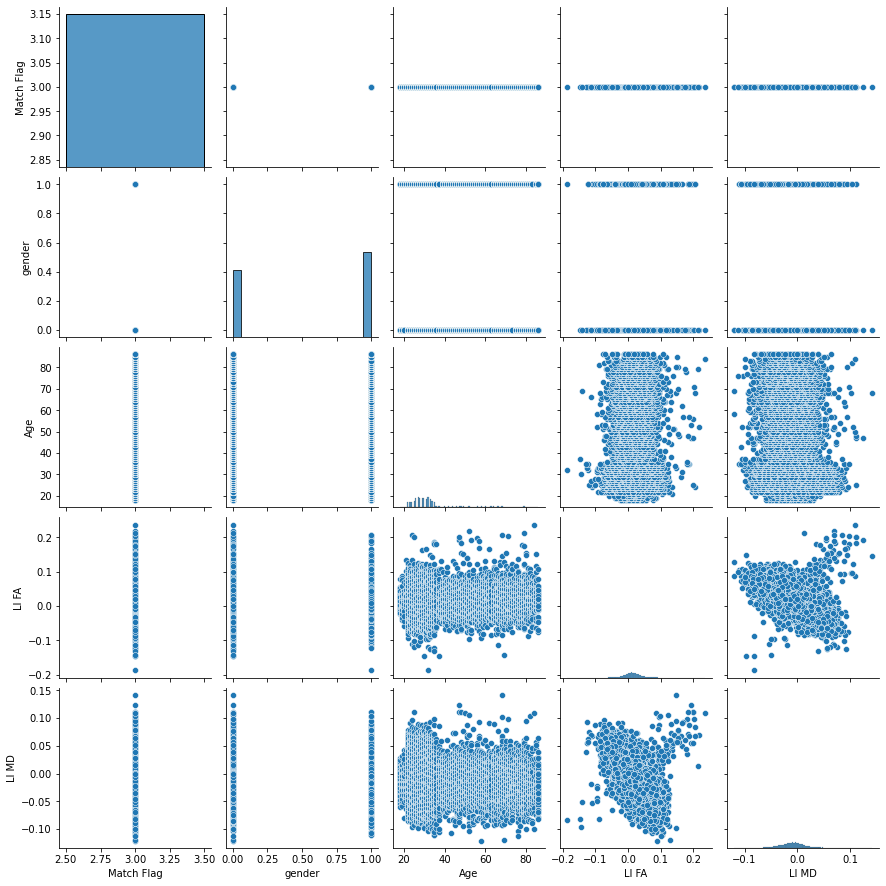

In [11]:
# create a pairplot to visually see correlations between data
sns.pairplot(the_ml_data, palette = 'magma')

## Machine Learning Model

#### Using elbow method to see how many clusters that will be most efficient for algorithm

In [12]:
# Normalize the data
# use min-max scaling to normalize the data
min_max_scaler = preprocessing.MinMaxScaler()
the_ml_data = min_max_scaler.fit_transform(the_ml_data)
the_ml_data = pd.DataFrame(the_ml_data)

In [13]:
the_ml_data

,0,1,2,3,4
0,0.0,1.0,0.0,0.488068,0.389624
1,0.0,1.0,0.0,0.496884,0.423777
2,0.0,1.0,0.0,0.476882,0.359104
3,0.0,1.0,0.0,0.491020,0.377418
4,0.0,1.0,0.0,0.474258,0.438265
...,...,...,...,...,...
34604,0.0,0.0,1.0,0.276417,0.568474
34605,0.0,0.0,1.0,0.510379,0.434316
34606,0.0,0.0,1.0,0.551555,0.323261
34607,0.0,0.0,1.0,0.329056,0.605739


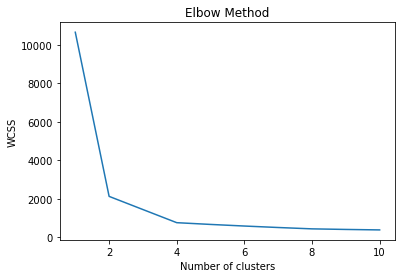

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(the_ml_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

###### Three Clusters seeem to be the best from the analysis above, but since we only have 1000 datapoints, 10 should be better as outliers would make their own clusters!

In [15]:
df.describe()

,Match Flag,gender,Age,LI FA,LI MD,LI Volume,hand
count,34609.0,34609.000000,34609.000000,34609.000000,34609.000000,34609.000000,34609.000000
mean,3.0,0.556618,36.460999,0.014758,-0.009101,0.003943,70.359184
std,0.0,0.496791,15.026259,0.026767,0.024357,0.110333,46.750252
min,3.0,0.000000,18.000000,-0.187483,-0.120564,-0.726049,-100.000000
25%,3.0,0.000000,27.000000,-0.001247,-0.023805,-0.052326,70.000000
50%,3.0,1.000000,31.000000,0.014058,-0.008778,0.008024,88.000000
75%,3.0,1.000000,38.000000,0.029813,0.005455,0.063520,100.000000
max,3.0,1.000000,86.000000,0.237326,0.141657,0.649430,100.000000


In [16]:
# other part
km = KMeans(n_clusters=10).fit(the_ml_data)


cluster_map = pd.DataFrame()
cluster_map['Match'] = df['Match Flag']
cluster_map['data_index'] = the_ml_data.index.values
cluster_map['cluster'] = km.labels_ ########## This is where we put in the clusters that were found
cluster_map['Gender'] = pd.Series(df['gender'])
cluster_map['Age'] = pd.Series(df['Age'])
cluster_map['FA'] = df['LI FA']
cluster_map['MD'] = df['LI MD']
cluster_map

,Match,data_index,cluster,Gender,Age,FA,MD
979,3,0,9,1,18.0,0.019852,-0.018396
980,3,1,9,1,18.0,0.023598,-0.009441
981,3,2,9,1,18.0,0.015100,-0.026399
982,3,3,9,1,18.0,0.021106,-0.021597
983,3,4,9,1,18.0,0.013985,-0.005642
...,...,...,...,...,...,...,...
44640,3,34604,2,0,86.0,-0.070059,0.028502
44641,3,34605,2,0,86.0,0.029330,-0.006677
44643,3,34606,2,0,86.0,0.046822,-0.035798
44644,3,34607,2,0,86.0,-0.047697,0.038274


In [17]:
first_cluster = cluster_map[cluster_map.cluster == 0]
first_cluster.head()

,Match,data_index,cluster,Gender,Age,FA,MD
1015,3,33,0,1,18.0,0.003755,0.028738
1018,3,36,0,1,18.0,-0.011557,0.013747
1019,3,37,0,1,18.0,-0.013564,0.007275
1022,3,40,0,1,18.0,0.009035,0.018224
1025,3,43,0,1,18.0,-0.004388,0.016696


In [18]:
second_cluster = cluster_map[cluster_map.cluster == 1]
second_cluster.head()

,Match,data_index,cluster,Gender,Age,FA,MD
1037,3,49,1,0,18.0,0.023365,-0.033572
1039,3,51,1,0,18.0,0.053506,-0.041551
1040,3,52,1,0,18.0,0.009824,-0.039050
1041,3,53,1,0,18.0,0.032223,-0.034894
1042,3,54,1,0,18.0,0.035675,-0.026216


In [19]:
third_cluster = cluster_map[cluster_map.cluster == 2]
third_cluster.head()

,Match,data_index,cluster,Gender,Age,FA,MD
39485,3,30782,2,0,61.0,0.069848,-0.031947
39486,3,30783,2,0,61.0,0.094361,-0.067790
39497,3,30792,2,0,61.0,0.027273,-0.042255
39498,3,30793,2,0,61.0,0.047795,-0.058378
39504,3,30798,2,0,61.0,0.060632,-0.036339


In [20]:
fourth_cluster = cluster_map[cluster_map.cluster == 3]
fourth_cluster.head()

,Match,data_index,cluster,Gender,Age,FA,MD
39151,3,30496,3,1,60.0,0.056477,-0.050936
39203,3,30542,3,1,60.0,0.033675,-0.094149
39379,3,30684,3,1,60.0,0.059974,-0.051301
39400,3,30704,3,1,61.0,-0.007203,0.001028
39401,3,30705,3,1,61.0,-0.012220,0.000151


In [21]:
c5 = cluster_map[cluster_map.cluster == 4]
c5.head()

,Match,data_index,cluster,Gender,Age,FA,MD
984,3,5,4,1,18.0,0.042641,-0.026272
989,3,10,4,1,18.0,0.031264,-0.036548
990,3,11,4,1,18.0,0.043425,-0.050971
1002,3,21,4,1,18.0,0.032580,-0.030642
1119,3,105,4,1,19.0,0.013507,-0.036430


In [22]:
c6 = cluster_map[cluster_map.cluster == 5]
c6.head()

,Match,data_index,cluster,Gender,Age,FA,MD
1038,3,50,5,0,18.0,-0.013727,0.004789
1043,3,55,5,0,18.0,-0.006956,-0.016000
1044,3,56,5,0,18.0,0.014863,-0.002331
1045,3,57,5,0,18.0,0.034697,-0.016693
1046,3,58,5,0,18.0,0.019181,-0.013353


In [23]:
c7 = cluster_map[cluster_map.cluster == 6]
c7.head()

,Match,data_index,cluster,Gender,Age,FA,MD
34282,3,26239,6,1,40.0,0.036947,-0.017465
34283,3,26240,6,1,40.0,0.023737,-0.018373
34285,3,26242,6,1,40.0,0.003358,0.005396
34286,3,26243,6,1,40.0,0.019035,-0.025259
34287,3,26244,6,1,40.0,-0.001524,-0.016340


In [24]:
c8 = cluster_map[cluster_map.cluster == 7]
c8.head()

,Match,data_index,cluster,Gender,Age,FA,MD
34091,3,26091,7,0,39.0,0.011069,-0.018441
34093,3,26093,7,0,39.0,-0.001737,-0.017138
34098,3,26097,7,0,39.0,0.001189,-0.020624
34107,3,26106,7,0,39.0,0.019484,-0.016187
34142,3,26122,7,0,39.0,0.013000,-0.013641


In [25]:
c9 = cluster_map[cluster_map.cluster == 8]
c9.head()

,Match,data_index,cluster,Gender,Age,FA,MD
1053,3,64,8,0,18.0,-0.007205,0.024269
1078,3,88,8,0,18.0,0.003164,0.020017
1084,3,94,8,0,18.0,-0.020644,0.023833
1154,3,135,8,0,19.0,-0.022814,0.013519
1157,3,138,8,0,19.0,-0.020241,0.016131


In [26]:
c10 = cluster_map[cluster_map.cluster == 9]
c10.head()

,Match,data_index,cluster,Gender,Age,FA,MD
979,3,0,9,1,18.0,0.019852,-0.018396
980,3,1,9,1,18.0,0.023598,-0.009441
981,3,2,9,1,18.0,0.015100,-0.026399
982,3,3,9,1,18.0,0.021106,-0.021597
983,3,4,9,1,18.0,0.013985,-0.005642


In [27]:
print('First Cluster:', first_cluster.count())
print('Second Cluster:', second_cluster.count())
print('Third Cluster:', third_cluster.count())
print('Fourth Cluster:', fourth_cluster.count())
print('5th Cluster:', c5.count())
print('6th Cluster:', c6.count())
print('7th Cluster:', c7.count())
print('8th Cluster:', c8.count())
print('9th Cluster:', c9.count())
print('10th Cluster:', c10.count())

First Cluster: Match         3602
data_index    3602
cluster       3602
Gender        3602
Age           3602
FA            3602
MD            3602
dtype: int64
Second Cluster: Match         2670
data_index    2670
cluster       2670
Gender        2670
Age           2670
FA            2670
MD            2670
dtype: int64
Third Cluster: Match         1864
data_index    1864
cluster       1864
Gender        1864
Age           1864
FA            1864
MD            1864
dtype: int64
Fourth Cluster: Match         2015
data_index    2015
cluster       2015
Gender        2015
Age           2015
FA            2015
MD            2015
dtype: int64
5th Cluster: Match         3316
data_index    3316
cluster       3316
Gender        3316
Age           3316
FA            3316
MD            3316
dtype: int64
6th Cluster: Match         6181
data_index    6181
cluster       6181
Gender        6181
Age           6181
FA            6181
MD            6181
dtype: int64
7th Cluster: Match         2207
data

In [28]:
# Creating Graphs for all of the features that we want

dict_Match_cluster = {
    'Cluster1': first_cluster['Match'].mean(),
    'Cluster2': second_cluster['Match'].mean(),
    'Cluster3': third_cluster['Match'].mean(),
    'Cluster4': fourth_cluster['Match'].mean(),
    'Cluster5': c5['Match'].mean(),
    'Cluster6': c6['Match'].mean(),
    'Cluster7': c7['Match'].mean(),
    'Cluster8': c8['Match'].mean(),
    'Cluster9': c9['Match'].mean(),
    'Cluster10': c10['Match'].mean()

}
Match_cluster = pd.Series(dict_Match_cluster)

dict_age_cluster = {
    'Cluster1': first_cluster['Age'].mean(),
    'Cluster2': second_cluster['Age'].mean(),
    'Cluster3': third_cluster['Age'].mean(),
    'Cluster4': fourth_cluster['Age'].mean(),
    'Cluster5': c5['Age'].mean(),
    'Cluster6': c6['Age'].mean(),
    'Cluster7': c7['Age'].mean(),
    'Cluster8': c8['Age'].mean(),
    'Cluster9': c9['Age'].mean(),
    'Cluster10': c10['Age'].mean()
}
age_cluster = pd.Series(dict_age_cluster)


dict_FA_cluster = {
    'Cluster1': first_cluster['FA'].mean(),
    'Cluster2': second_cluster['FA'].mean(),
    'Cluster3': third_cluster['FA'].mean(),
    'Cluster4': fourth_cluster['FA'].mean(),
    'Cluster5': c5['FA'].mean(),
    'Cluster6': c6['FA'].mean(),
    'Cluster7': c7['FA'].mean(),
    'Cluster8': c8['FA'].mean(),
    'Cluster9': c9['FA'].mean(),
    'Cluster10': c10['FA'].mean()
}
FA_cluster = pd.Series(dict_FA_cluster)

dict_MD_cluster = {
    'Cluster1': first_cluster['MD'].mean(),
    'Cluster2': second_cluster['MD'].mean(),
    'Cluster3': third_cluster['MD'].mean(),
    'Cluster4': fourth_cluster['MD'].mean(),
    'Cluster5': c5['MD'].mean(),
    'Cluster6': c6['MD'].mean(),
    'Cluster7': c7['MD'].mean(),
    'Cluster8': c8['MD'].mean(),
    'Cluster9': c9['MD'].mean(),
    'Cluster10': c10['MD'].mean()
}
MD_cluster = pd.Series(dict_MD_cluster)


dict_gender_cluster = {
    'Cluster1': first_cluster['Gender'].mean(),
    'Cluster2': second_cluster['Gender'].mean(),
    'Cluster3': third_cluster['Gender'].mean(),
    'Cluster4': fourth_cluster['Gender'].mean(),
    'Cluster5': c5['Gender'].mean(),
    'Cluster6': c6['Gender'].mean(),
    'Cluster7': c7['Gender'].mean(),
    'Cluster8': c8['Gender'].mean(),
    'Cluster9': c9['Gender'].mean(),
    'Cluster10': c10['Gender'].mean()
}
gender_cluster = pd.Series(dict_gender_cluster)

total_features_dict = {
    'Match': Match_cluster,
    'Age': age_cluster,
    'FA':FA_cluster,
    'MD': MD_cluster,
    'Gender': gender_cluster
}


In [29]:
total_features = pd.DataFrame(total_features_dict)
total_features

,Match,Age,FA,MD,Gender
Cluster1,3.0,29.692750,-0.010557,0.021573,1.0
Cluster2,3.0,28.834831,0.041569,-0.037866,0.0
Cluster3,3.0,72.243026,0.021539,-0.018333,0.0
Cluster4,3.0,70.974690,0.016850,-0.013884,1.0
Cluster5,3.0,30.143697,0.041307,-0.039327,1.0
Cluster6,3.0,28.094160,0.012103,-0.006151,0.0
Cluster7,3.0,50.027639,0.013039,-0.011145,1.0
Cluster8,3.0,49.982424,0.017047,-0.015710,0.0
Cluster9,3.0,28.486224,-0.012797,0.025464,0.0
Cluster10,3.0,29.280887,0.014507,-0.008038,1.0


[Text(0.5, 1.0, 'Gender vs. Cluster')]

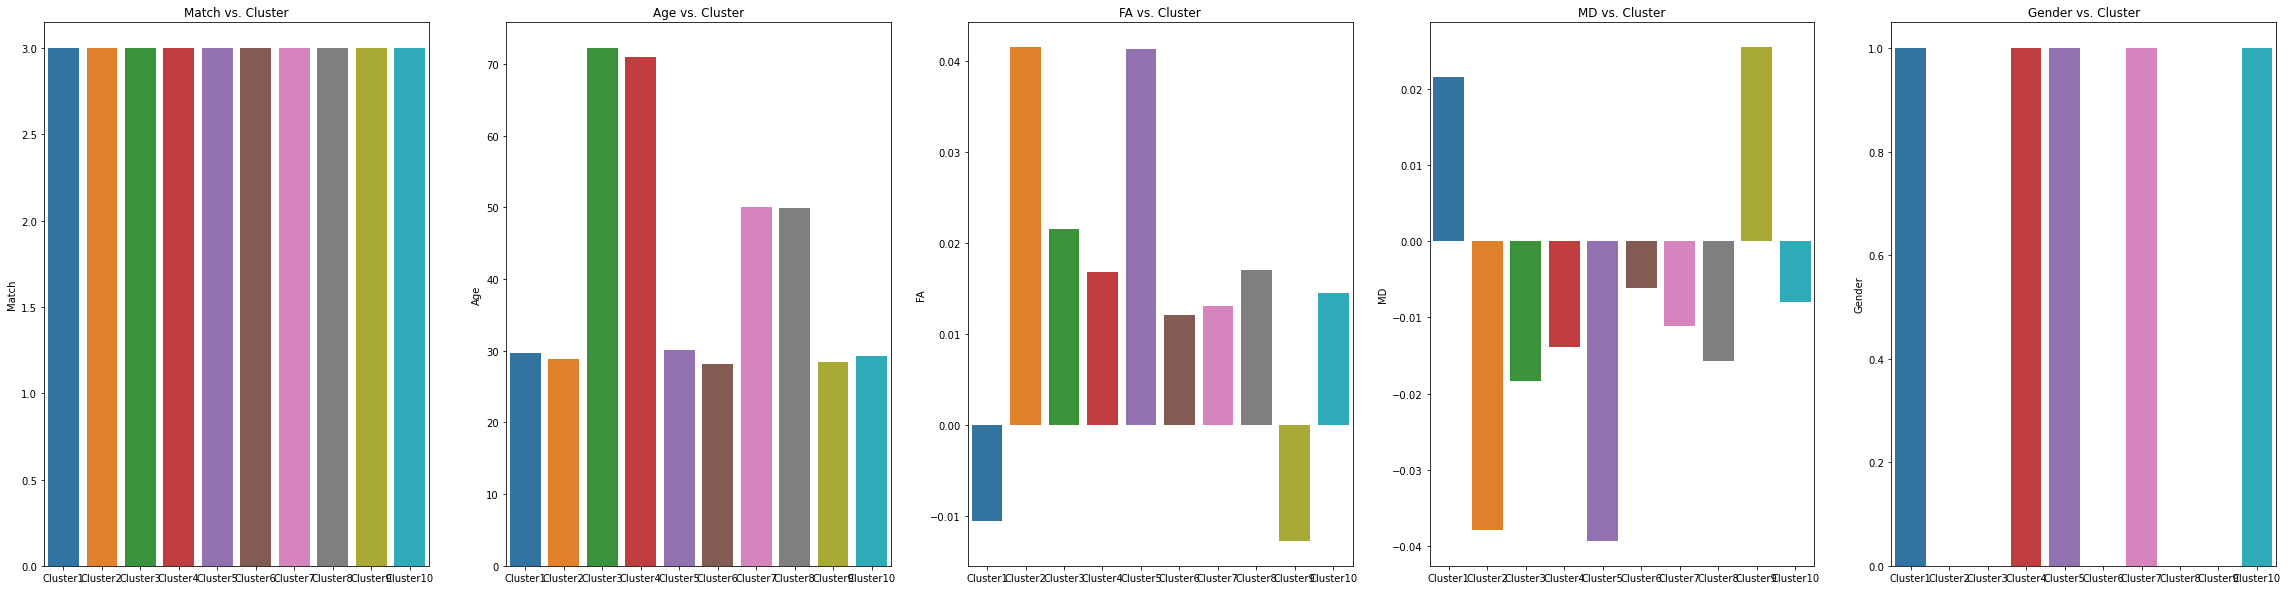

In [30]:
fig, ax = plt.subplots(1, 5, figsize=(40, 10))
clusters = total_features.index
sns.barplot(x=clusters, y=total_features['Match'],ax=ax[0]).set(title = 'Match vs. Cluster')
sns.barplot(x=clusters, y=total_features['Age'],ax=ax[1]).set(title = 'Age vs. Cluster')
sns.barplot(x=clusters, y=total_features['FA'],ax=ax[2]).set(title = 'FA vs. Cluster')
sns.barplot(x=clusters, y=total_features['MD'],ax=ax[3]).set(title = 'MD vs. Cluster')
sns.barplot(x=clusters, y=total_features['Gender'],ax=ax[4]).set(title = 'Gender vs. Cluster')



### Looking into each one of the clusters to see the different patterns they might have 

(0.0, 1.1)

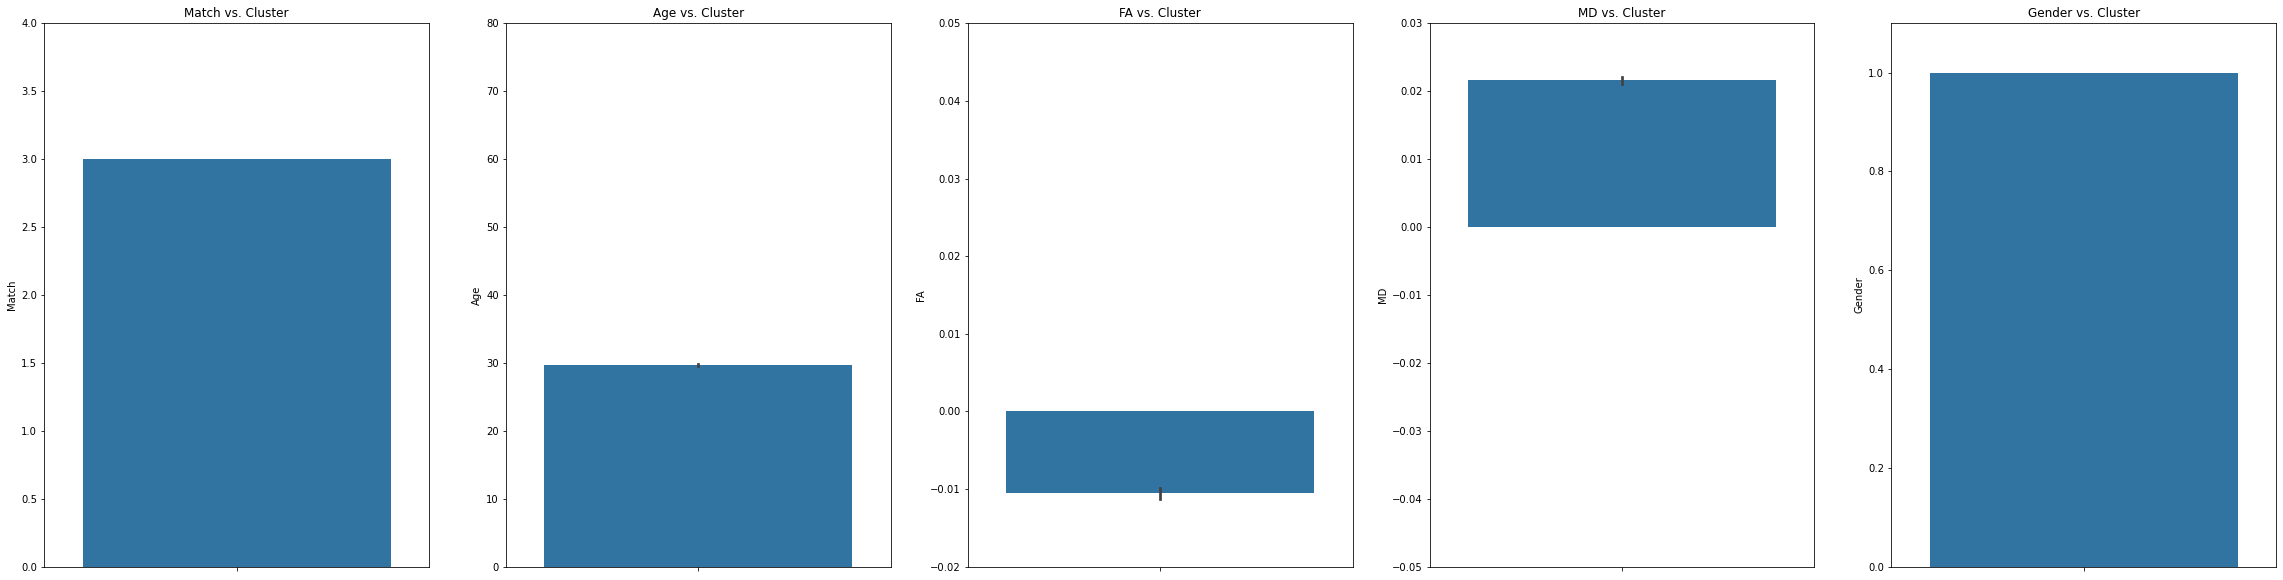

In [31]:
fig1, ax1 = plt.subplots(1, 5, figsize=(40, 10))
clusters = total_features.index
sns.barplot(y=first_cluster['Match'],ax=ax1[0]).set(title = 'Match vs. Cluster')
sns.barplot(y=first_cluster['Age'],ax=ax1[1]).set(title = 'Age vs. Cluster')
sns.barplot(y=first_cluster['FA'],ax=ax1[2]).set(title = 'FA vs. Cluster')
sns.barplot(y=first_cluster['MD'],ax=ax1[3]).set(title = 'MD vs. Cluster')
sns.barplot(y=first_cluster['Gender'],ax=ax1[4]).set(title = 'Gender vs. Cluster')


# chaging y values
ax1[0].set_ylim(0,4)
ax1[1].set_ylim(0,80)
ax1[2].set_ylim(-0.02,0.05)
ax1[3].set_ylim(-0.05,0.03)
ax1[4].set_ylim(0,1.1)


(0.0, 1.1)

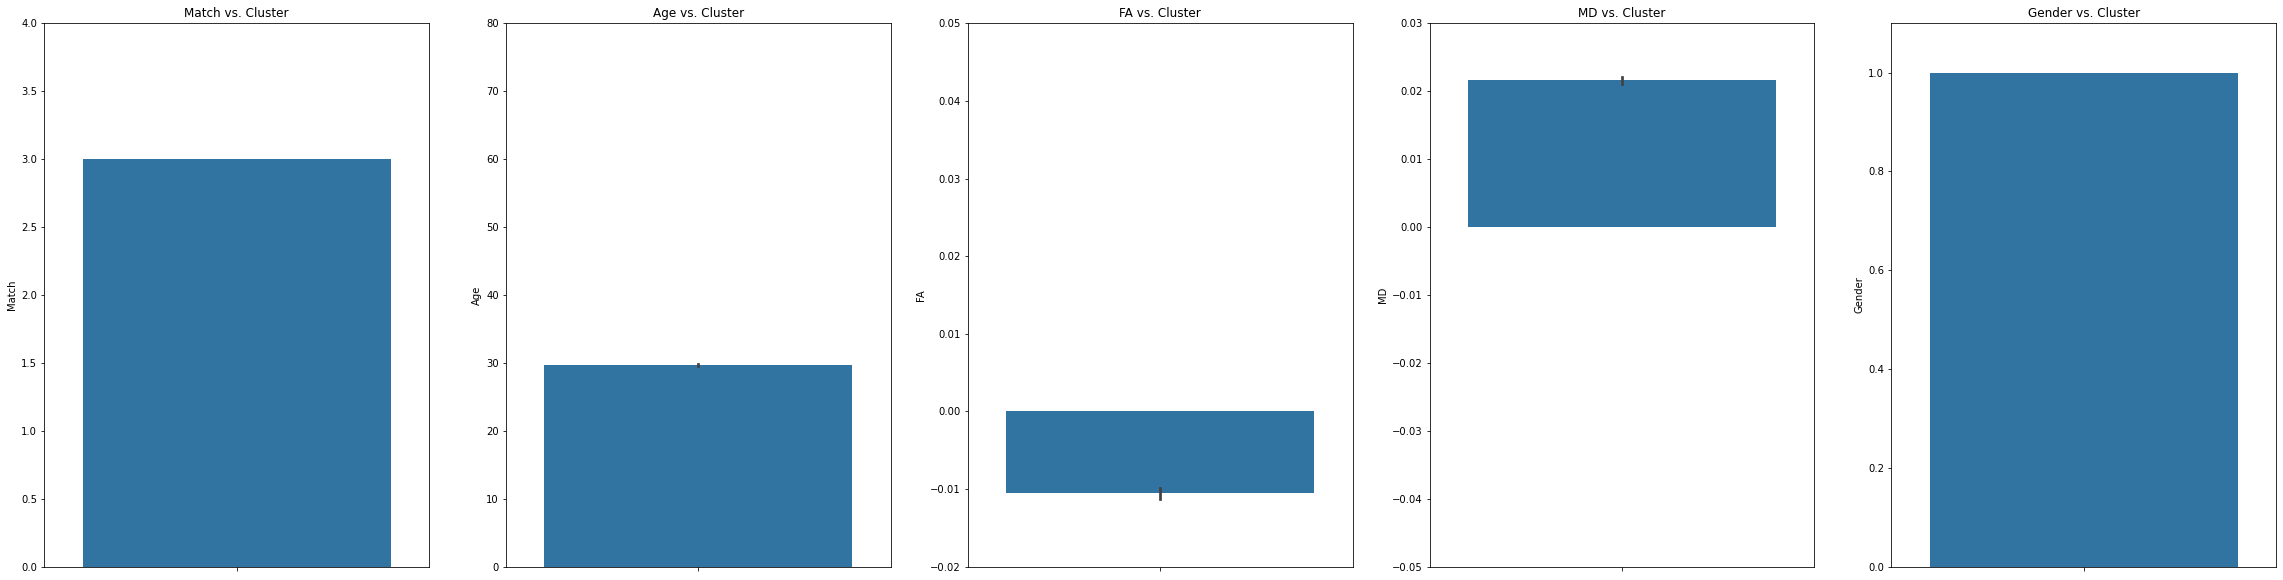

In [32]:
fig1, ax1 = plt.subplots(1, 5, figsize=(40, 10))
clusters = total_features.index
sns.barplot(y=first_cluster['Match'],ax=ax1[0]).set(title = 'Match vs. Cluster')
sns.barplot(y=first_cluster['Age'],ax=ax1[1]).set(title = 'Age vs. Cluster')
sns.barplot(y=first_cluster['FA'],ax=ax1[2]).set(title = 'FA vs. Cluster')
sns.barplot(y=first_cluster['MD'],ax=ax1[3]).set(title = 'MD vs. Cluster')
sns.barplot(y=first_cluster['Gender'],ax=ax1[4]).set(title = 'Gender vs. Cluster')


# chaging y values
ax1[0].set_ylim(0,4)
ax1[1].set_ylim(0,80)
ax1[2].set_ylim(-0.02,0.05)
ax1[3].set_ylim(-0.05,0.03)
ax1[4].set_ylim(0,1.1)


(0.0, 1.1)

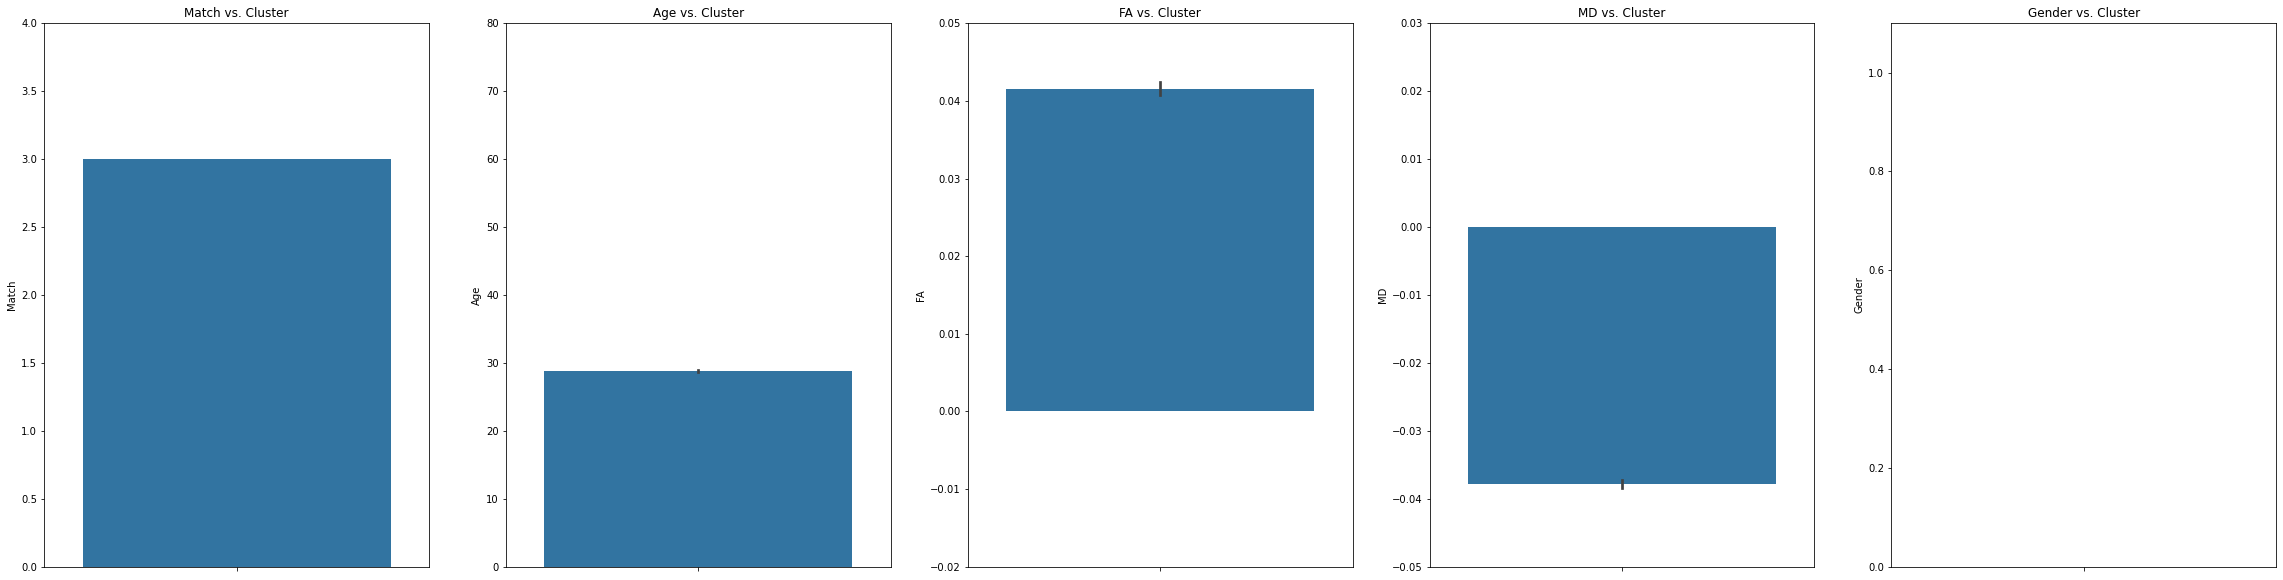

In [33]:
fig2, ax2 = plt.subplots(1, 5, figsize=(40, 10))
clusters = total_features.index
sns.barplot(y=second_cluster['Match'],ax=ax2[0]).set(title = 'Match vs. Cluster')
sns.barplot(y=second_cluster['Age'],ax=ax2[1]).set(title = 'Age vs. Cluster')
sns.barplot(y=second_cluster['FA'],ax=ax2[2]).set(title = 'FA vs. Cluster')
sns.barplot(y=second_cluster['MD'],ax=ax2[3]).set(title = 'MD vs. Cluster')
sns.barplot(y=second_cluster['Gender'],ax=ax2[4]).set(title = 'Gender vs. Cluster')


# chaging y values
ax2[0].set_ylim(0,4)
ax2[1].set_ylim(0,80)
ax2[2].set_ylim(-0.02,0.05)
ax2[3].set_ylim(-0.05,0.03)
ax2[4].set_ylim(0,1.1)


(0.0, 1.1)

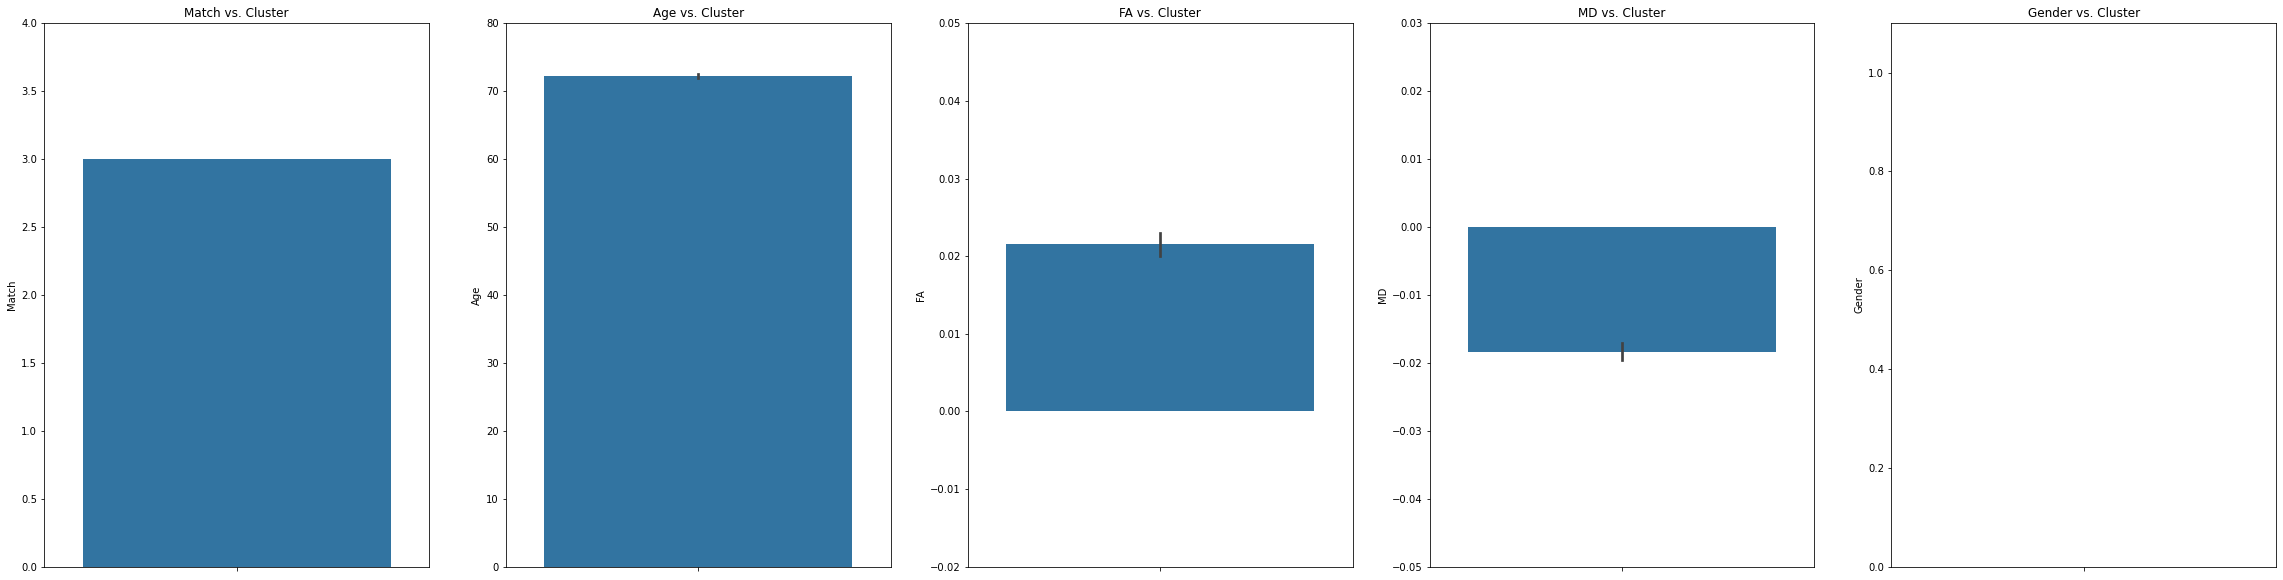

In [34]:
fig3, ax3 = plt.subplots(1, 5, figsize=(40, 10))
clusters = total_features.index
sns.barplot(y=third_cluster['Match'],ax=ax3[0]).set(title = 'Match vs. Cluster')
sns.barplot(y=third_cluster['Age'],ax=ax3[1]).set(title = 'Age vs. Cluster')
sns.barplot(y=third_cluster['FA'],ax=ax3[2]).set(title = 'FA vs. Cluster')
sns.barplot(y=third_cluster['MD'],ax=ax3[3]).set(title = 'MD vs. Cluster')
sns.barplot(y=third_cluster['Gender'],ax=ax3[4]).set(title = 'Gender vs. Cluster')


# chaging y values
ax3[0].set_ylim(0,4)
ax3[1].set_ylim(0,80)
ax3[2].set_ylim(-0.02,0.05)
ax3[3].set_ylim(-0.05,0.03)
ax3[4].set_ylim(0,1.1)


(0.0, 1.1)

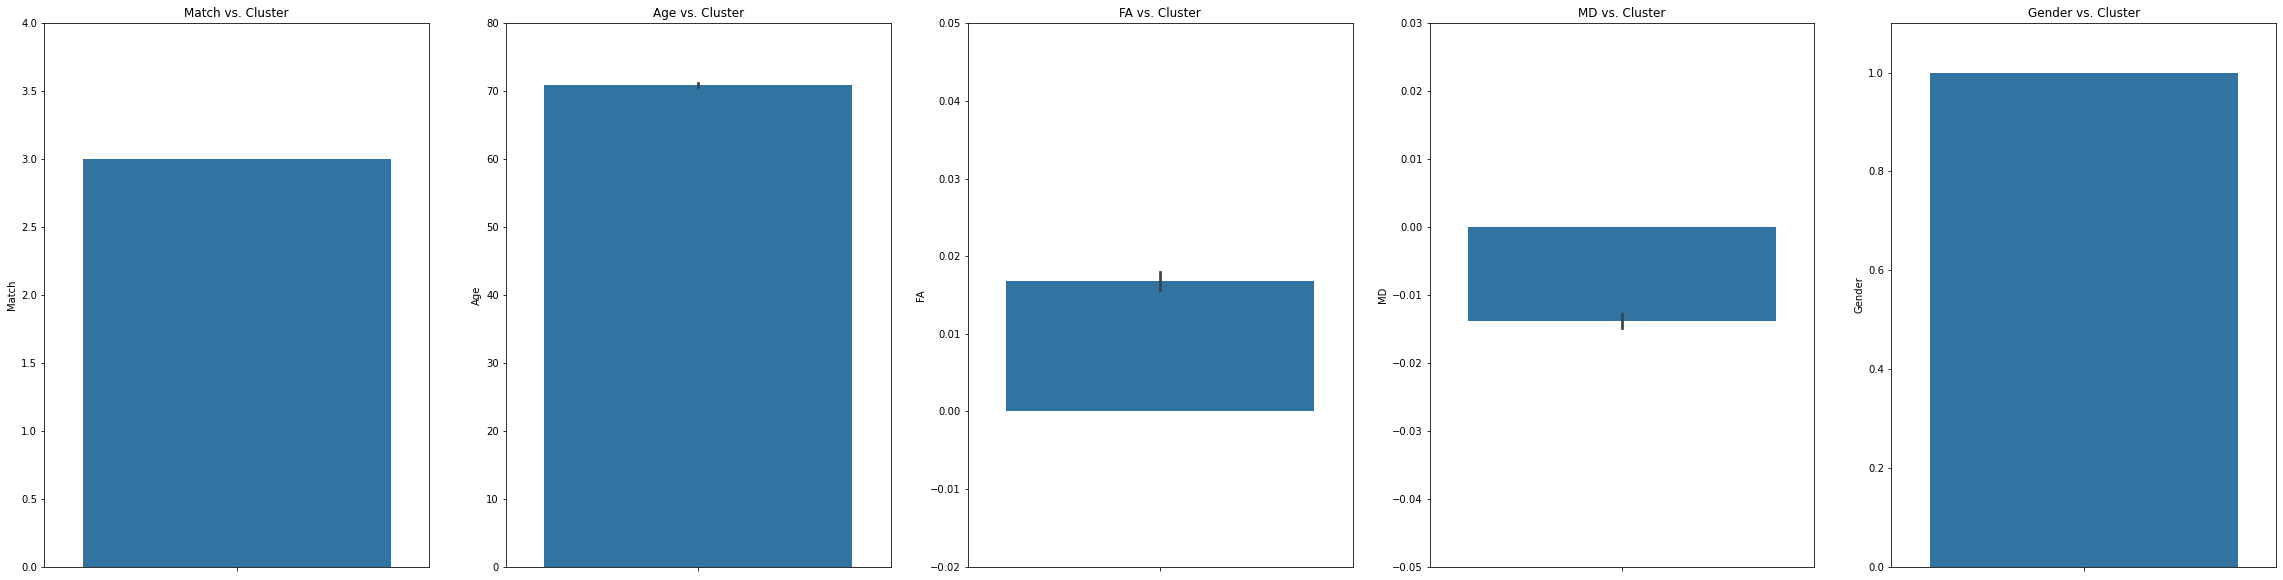

In [35]:
fig4, ax4 = plt.subplots(1, 5, figsize=(40, 10))
clusters = total_features.index
sns.barplot(y=fourth_cluster['Match'],ax=ax4[0]).set(title = 'Match vs. Cluster')
sns.barplot(y=fourth_cluster['Age'],ax=ax4[1]).set(title = 'Age vs. Cluster')
sns.barplot(y=fourth_cluster['FA'],ax=ax4[2]).set(title = 'FA vs. Cluster')
sns.barplot(y=fourth_cluster['MD'],ax=ax4[3]).set(title = 'MD vs. Cluster')
sns.barplot(y=fourth_cluster['Gender'],ax=ax4[4]).set(title = 'Gender vs. Cluster')


# chaging y values
ax4[0].set_ylim(0,4)
ax4[1].set_ylim(0,80)
ax4[2].set_ylim(-0.02,0.05)
ax4[3].set_ylim(-0.05,0.03)
ax4[4].set_ylim(0,1.1)


(0.0, 1.1)

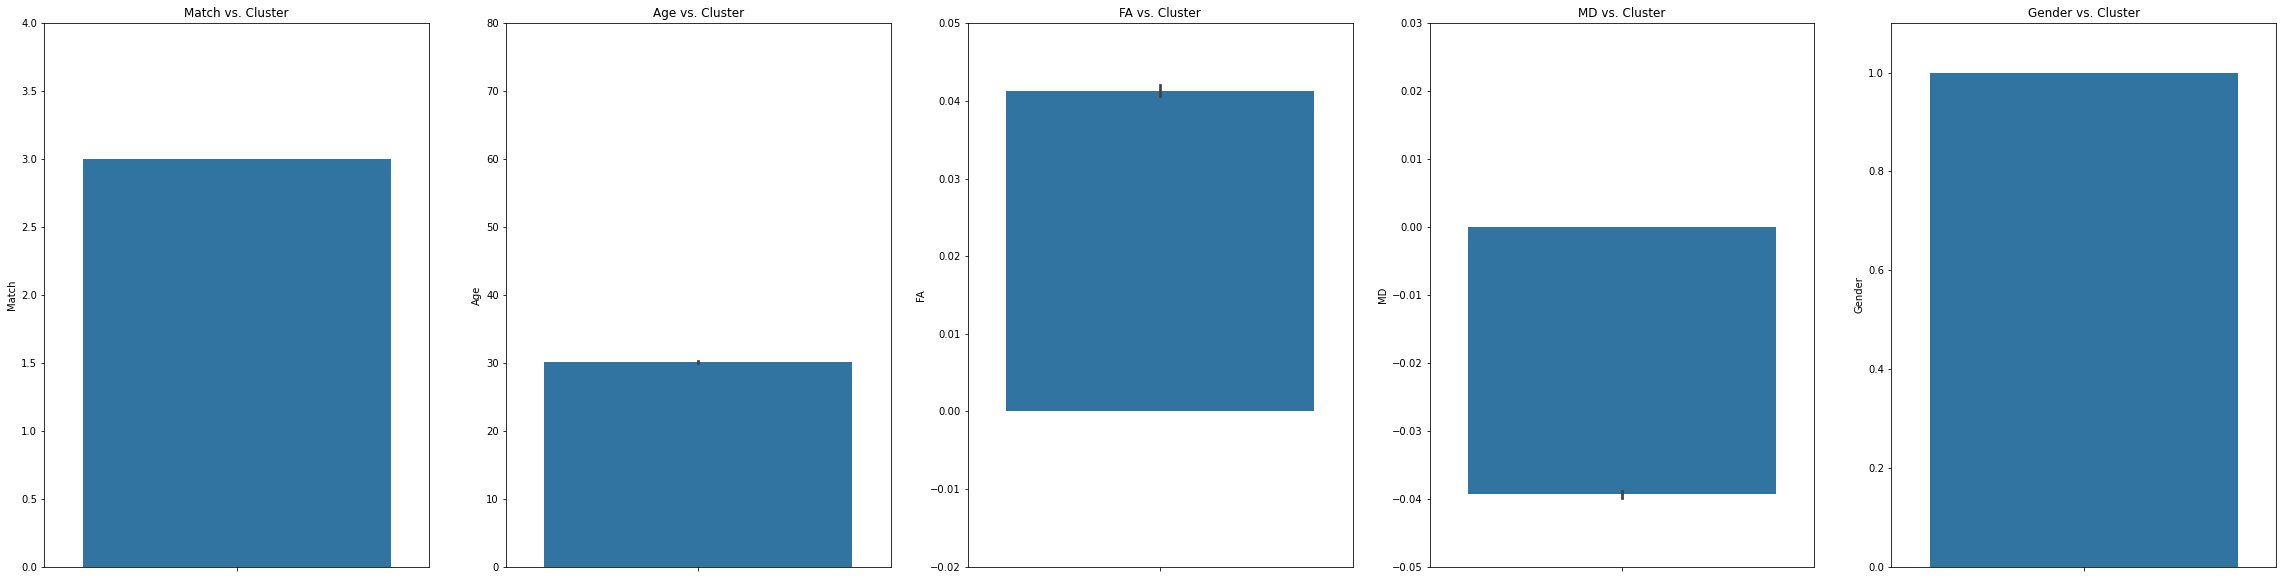

In [36]:
fig5, ax5 = plt.subplots(1, 5, figsize=(40, 10))
clusters = total_features.index
sns.barplot(y=c5['Match'],ax=ax5[0]).set(title = 'Match vs. Cluster')
sns.barplot(y=c5['Age'],ax=ax5[1]).set(title = 'Age vs. Cluster')
sns.barplot(y=c5['FA'],ax=ax5[2]).set(title = 'FA vs. Cluster')
sns.barplot(y=c5['MD'],ax=ax5[3]).set(title = 'MD vs. Cluster')
sns.barplot(y=c5['Gender'],ax=ax5[4]).set(title = 'Gender vs. Cluster')


# chaging y values
ax5[0].set_ylim(0,4)
ax5[1].set_ylim(0,80)
ax5[2].set_ylim(-0.02,0.05)
ax5[3].set_ylim(-0.05,0.03)
ax5[4].set_ylim(0,1.1)


(0.0, 1.1)

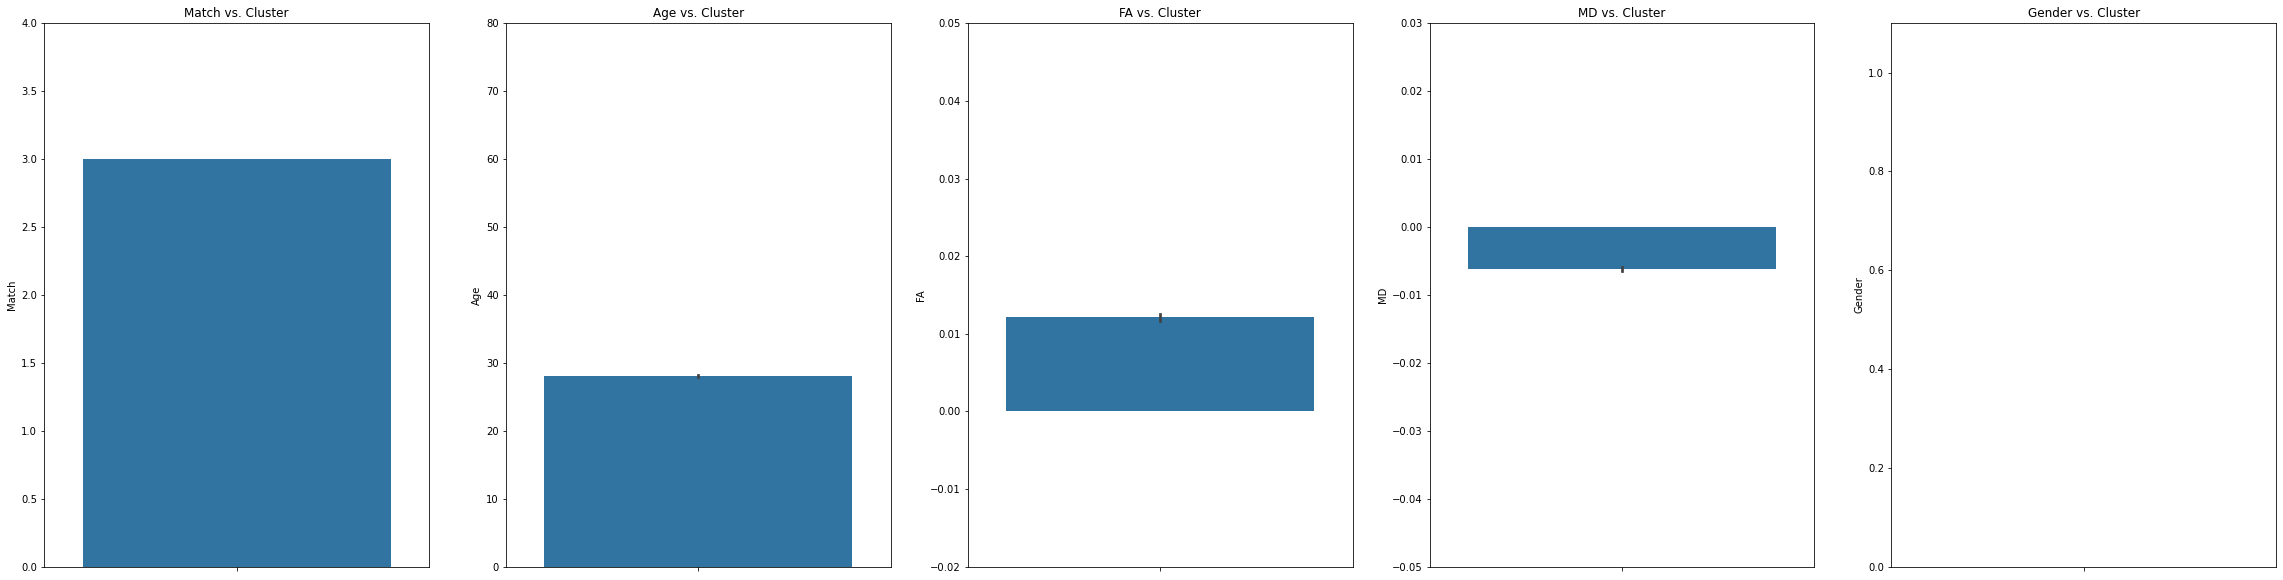

In [37]:
fig6, ax6 = plt.subplots(1, 5, figsize=(40, 10))
clusters = total_features.index
sns.barplot(y=c6['Match'],ax=ax6[0]).set(title = 'Match vs. Cluster')
sns.barplot(y=c6['Age'],ax=ax6[1]).set(title = 'Age vs. Cluster')
sns.barplot(y=c6['FA'],ax=ax6[2]).set(title = 'FA vs. Cluster')
sns.barplot(y=c6['MD'],ax=ax6[3]).set(title = 'MD vs. Cluster')
sns.barplot(y=c6['Gender'],ax=ax6[4]).set(title = 'Gender vs. Cluster')


# chaging y values
ax6[0].set_ylim(0,4)
ax6[1].set_ylim(0,80)
ax6[2].set_ylim(-0.02,0.05)
ax6[3].set_ylim(-0.05,0.03)
ax6[4].set_ylim(0,1.1)


(0.0, 1.1)

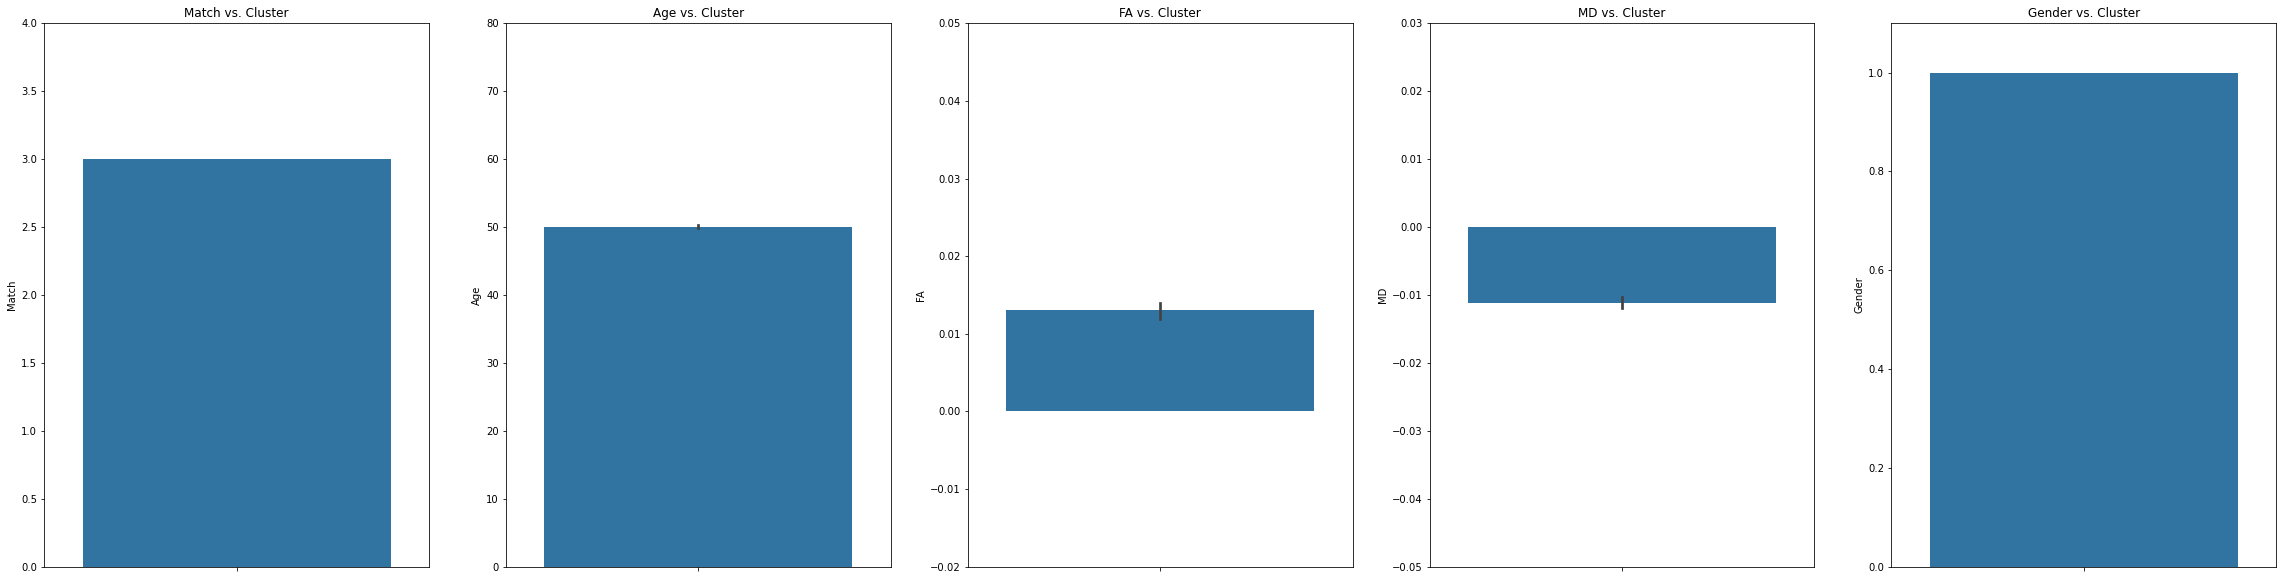

In [38]:
fig7, ax7 = plt.subplots(1, 5, figsize=(40, 10))
clusters = total_features.index
sns.barplot(y=c7['Match'],ax=ax7[0]).set(title = 'Match vs. Cluster')
sns.barplot(y=c7['Age'],ax=ax7[1]).set(title = 'Age vs. Cluster')
sns.barplot(y=c7['FA'],ax=ax7[2]).set(title = 'FA vs. Cluster')
sns.barplot(y=c7['MD'],ax=ax7[3]).set(title = 'MD vs. Cluster')
sns.barplot(y=c7['Gender'],ax=ax7[4]).set(title = 'Gender vs. Cluster')


# chaging y values
ax7[0].set_ylim(0,4)
ax7[1].set_ylim(0,80)
ax7[2].set_ylim(-0.02,0.05)
ax7[3].set_ylim(-0.05,0.03)
ax7[4].set_ylim(0,1.1)


(0.0, 1.1)

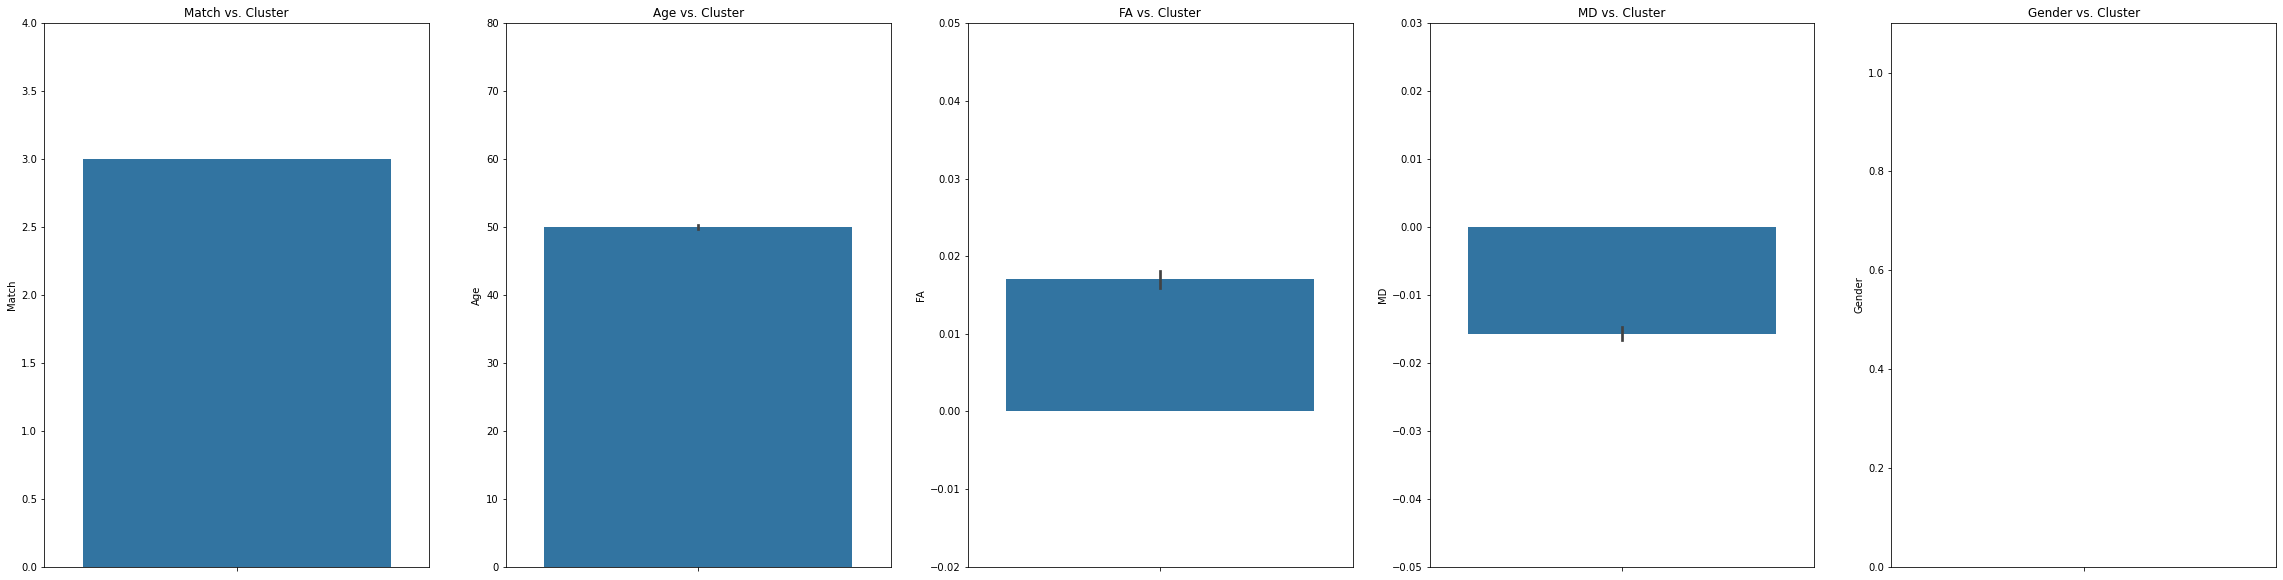

In [39]:
fig8, ax8 = plt.subplots(1, 5, figsize=(40, 10))
clusters = total_features.index
sns.barplot(y=c8['Match'],ax=ax8[0]).set(title = 'Match vs. Cluster')
sns.barplot(y=c8['Age'],ax=ax8[1]).set(title = 'Age vs. Cluster')
sns.barplot(y=c8['FA'],ax=ax8[2]).set(title = 'FA vs. Cluster')
sns.barplot(y=c8['MD'],ax=ax8[3]).set(title = 'MD vs. Cluster')
sns.barplot(y=c8['Gender'],ax=ax8[4]).set(title = 'Gender vs. Cluster')


# chaging y values
ax8[0].set_ylim(0,4)
ax8[1].set_ylim(0,80)
ax8[2].set_ylim(-0.02,0.05)
ax8[3].set_ylim(-0.05,0.03)
ax8[4].set_ylim(0,1.1)


(0.0, 1.1)

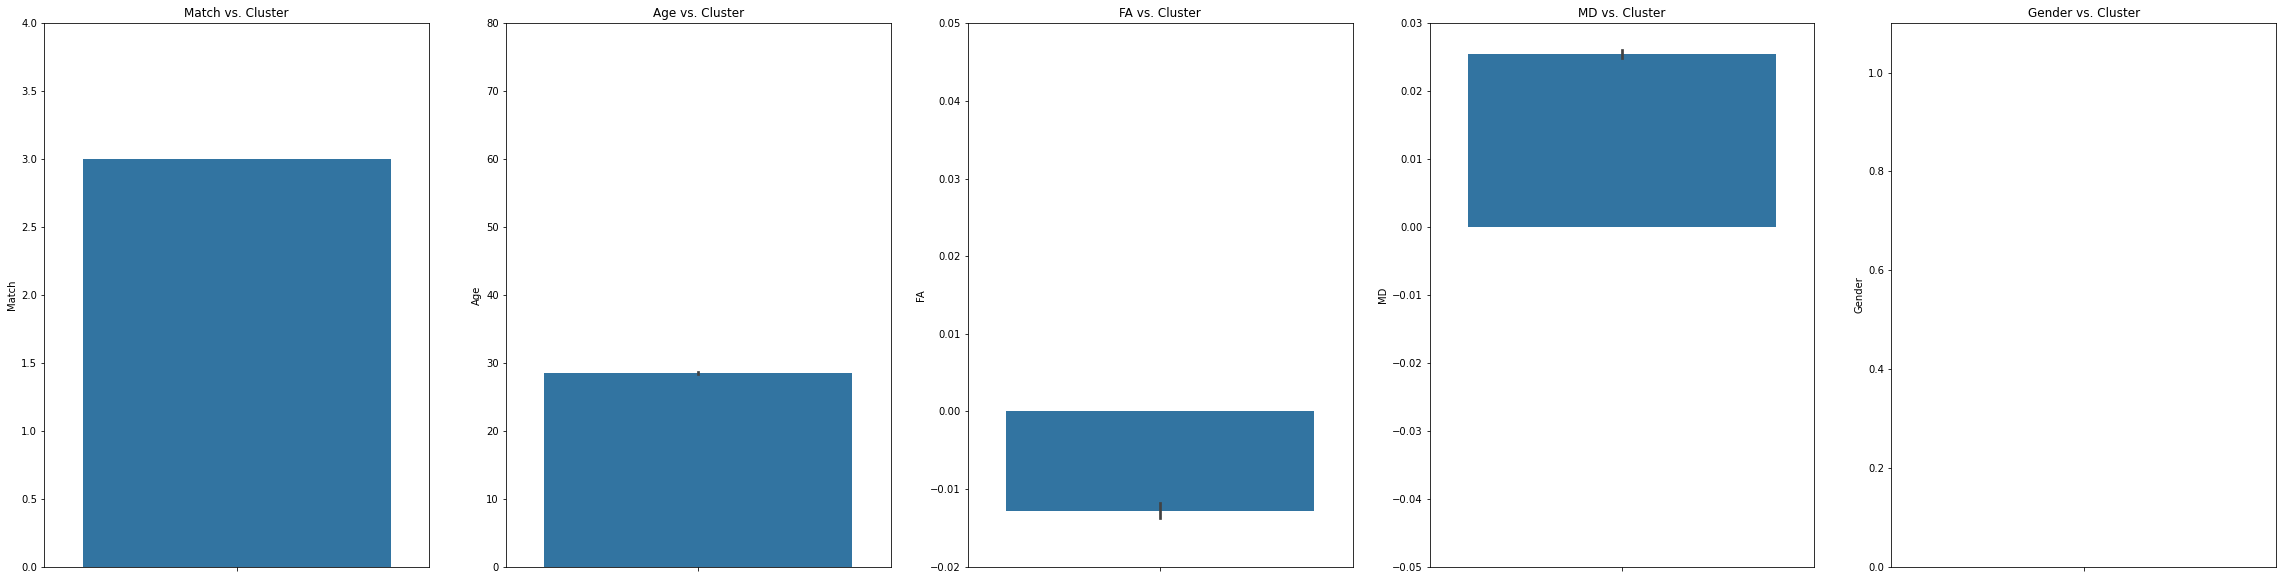

In [40]:
fig9, ax9 = plt.subplots(1, 5, figsize=(40, 10))
clusters = total_features.index
sns.barplot(y=c9['Match'],ax=ax9[0]).set(title = 'Match vs. Cluster')
sns.barplot(y=c9['Age'],ax=ax9[1]).set(title = 'Age vs. Cluster')
sns.barplot(y=c9['FA'],ax=ax9[2]).set(title = 'FA vs. Cluster')
sns.barplot(y=c9['MD'],ax=ax9[3]).set(title = 'MD vs. Cluster')
sns.barplot(y=c9['Gender'],ax=ax9[4]).set(title = 'Gender vs. Cluster')


# chaging y values
ax9[0].set_ylim(0,4)
ax9[1].set_ylim(0,80)
ax9[2].set_ylim(-0.02,0.05)
ax9[3].set_ylim(-0.05,0.03)
ax9[4].set_ylim(0,1.1)


(0.0, 1.1)

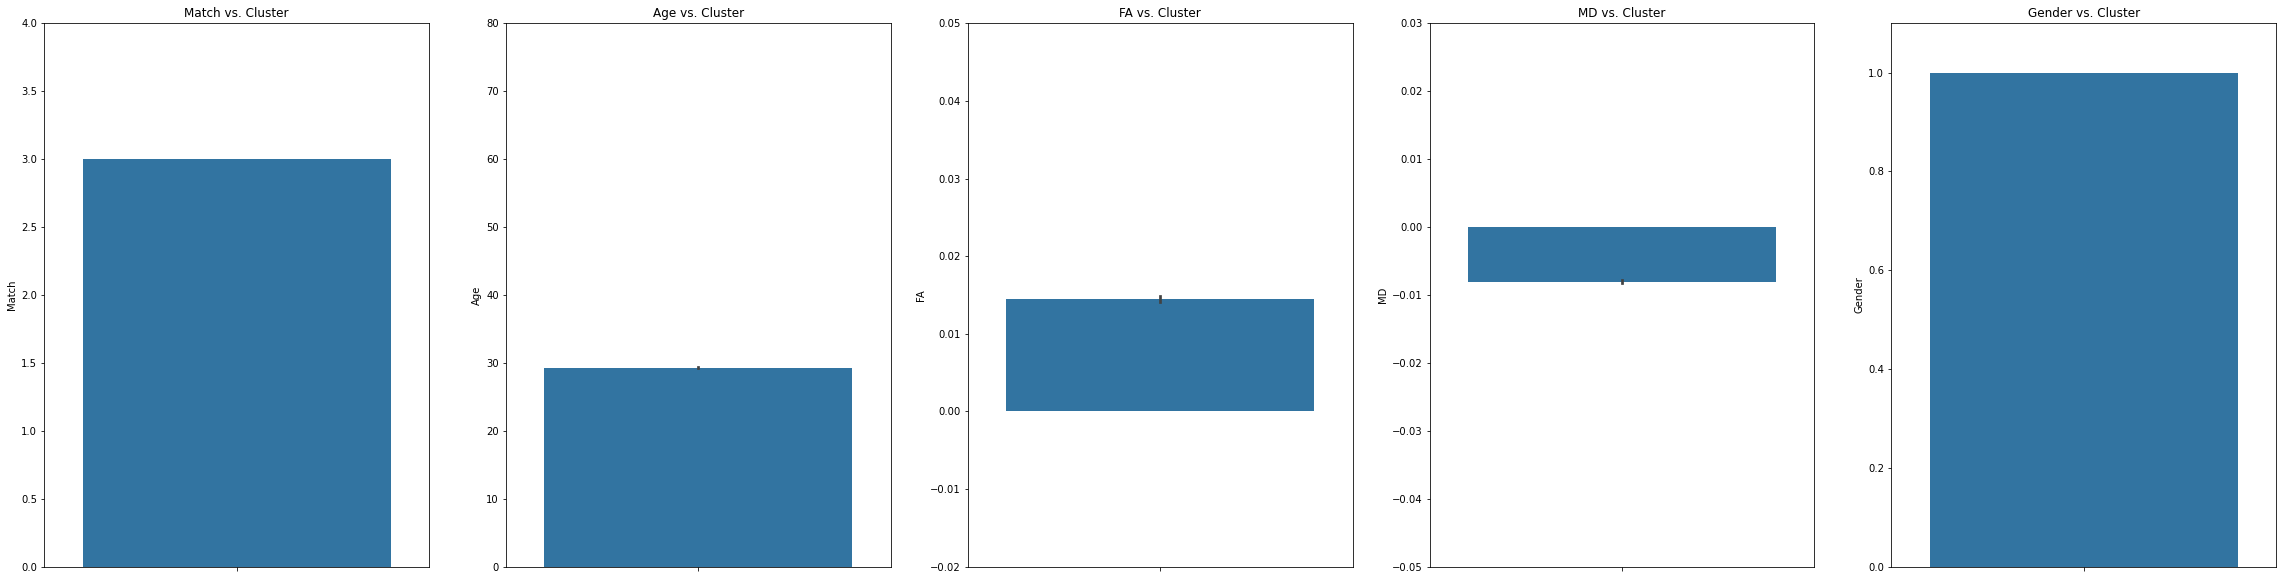

In [41]:
fig10, ax10 = plt.subplots(1, 5, figsize=(40, 10))
clusters = total_features.index
sns.barplot(y=c10['Match'],ax=ax10[0]).set(title = 'Match vs. Cluster')
sns.barplot(y=c10['Age'],ax=ax10[1]).set(title = 'Age vs. Cluster')
sns.barplot(y=c10['FA'],ax=ax10[2]).set(title = 'FA vs. Cluster')
sns.barplot(y=c10['MD'],ax=ax10[3]).set(title = 'MD vs. Cluster')
sns.barplot(y=c10['Gender'],ax=ax10[4]).set(title = 'Gender vs. Cluster')


# chaging y values
ax10[0].set_ylim(0,4)
ax10[1].set_ylim(0,80)
ax10[2].set_ylim(-0.02,0.05)
ax10[3].set_ylim(-0.05,0.03)
ax10[4].set_ylim(0,1.1)


### Plotting the different features together to see how the clustering was done

<AxesSubplot:xlabel='Age', ylabel='Match'>

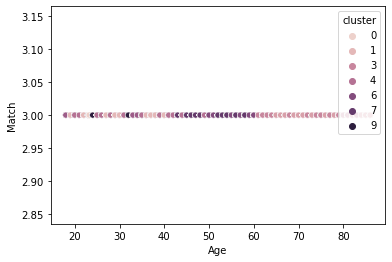

In [43]:
sns.scatterplot(y=cluster_map['Match'], x=cluster_map['Age'], hue=cluster_map['cluster'])

<AxesSubplot:xlabel='FA', ylabel='Age'>

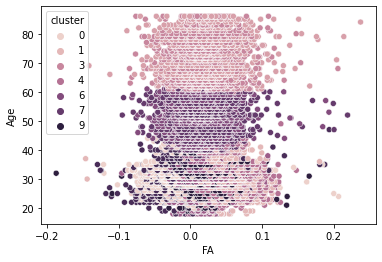

In [45]:
sns.scatterplot(y=cluster_map['Age'], x=cluster_map['FA'], hue=cluster_map['cluster'])

<AxesSubplot:xlabel='MD', ylabel='Age'>

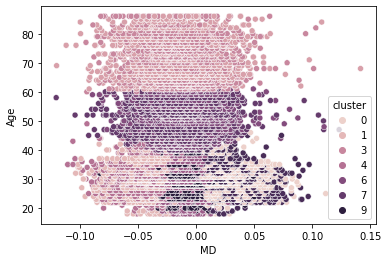

In [46]:
sns.scatterplot(y=cluster_map['Age'], x=cluster_map['MD'], hue=cluster_map['cluster'])

<AxesSubplot:xlabel='MD', ylabel='FA'>

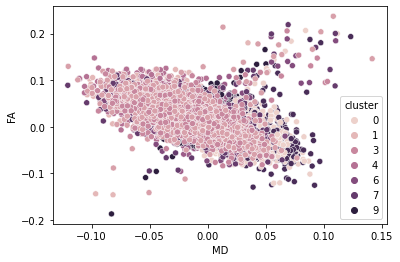

In [47]:
sns.scatterplot(y=cluster_map['FA'], x=cluster_map['MD'], hue=cluster_map['cluster'])

#### Clearly, budget was one of the features that used to cluster the data together as they are clearly seperated apart when budget is plotted.

# This is the Evaluation Part

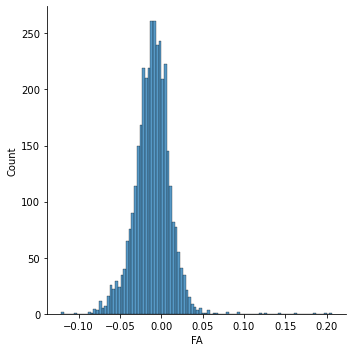

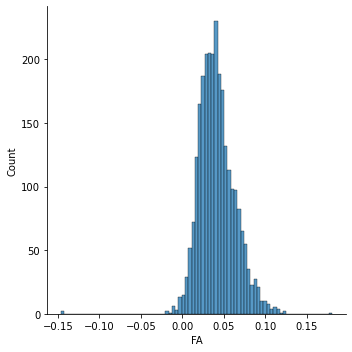

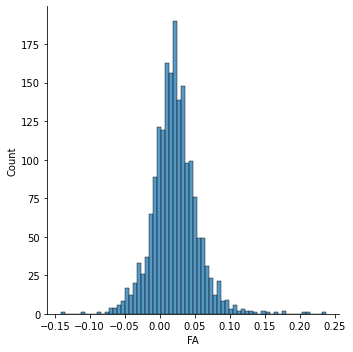

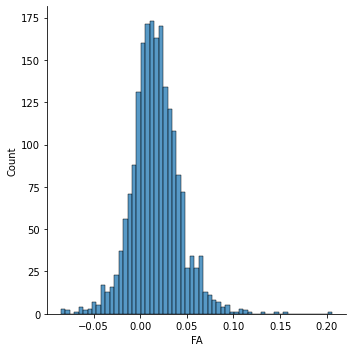

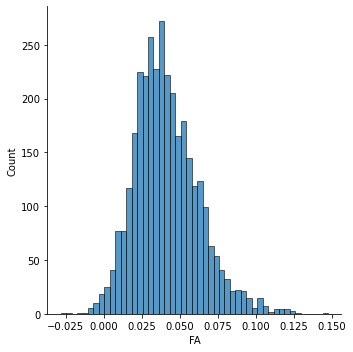

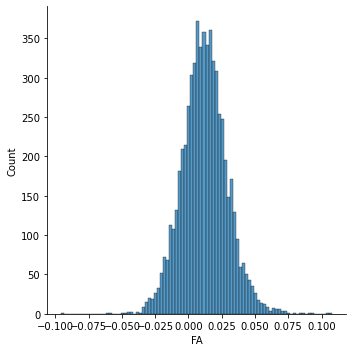

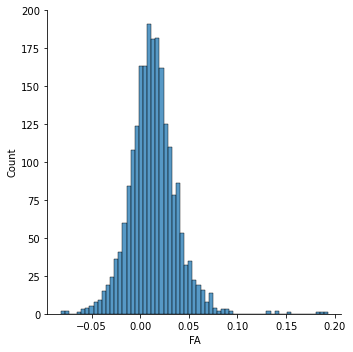

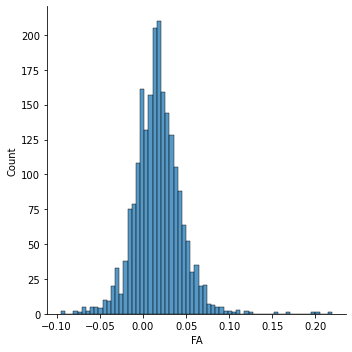

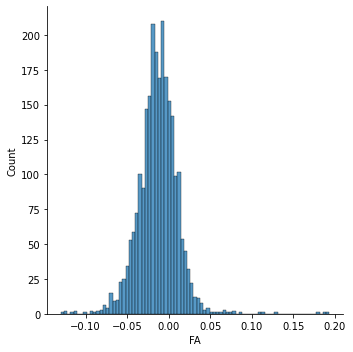

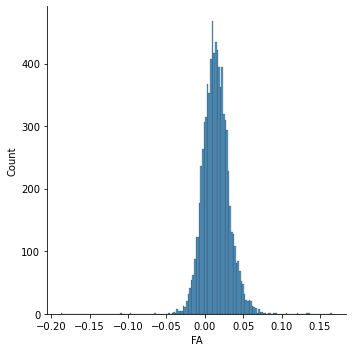

In [48]:
sns.displot(kind='hist',data=first_cluster['FA'])
sns.displot(kind='hist',data=second_cluster['FA'])
sns.displot(kind='hist',data=third_cluster['FA'])
sns.displot(kind='hist',data=fourth_cluster['FA'])
sns.displot(kind='hist',data=c5['FA'])
sns.displot(kind='hist',data=c6['FA'])
sns.displot(kind='hist',data=c7['FA'])
sns.displot(kind='hist',data=c8['FA'])
sns.displot(kind='hist',data=c9['FA'])
sns.displot(kind='hist',data=c10['FA'])

